In [32]:
import random, pylab
import numpy as np
import random

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [33]:
def getData(fileName):
    dataFile = open(fileName, 'r') # reads File which is in format Distance, Mass
    distances = []
    masses = []
    dataFile.readline() # read the header so they can be skipped
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m)) 
    dataFile.close()
    return (masses, distances)

def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

def plotData(fileName):
    xVals, yVals = getData(fileName) #reads data, masses will be xVals and distances will be yVals
    xVals = np.array(xVals)
    yVals = np.array(yVals)
    xVals = xVals*9.81  # Mass * gravity = Force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()

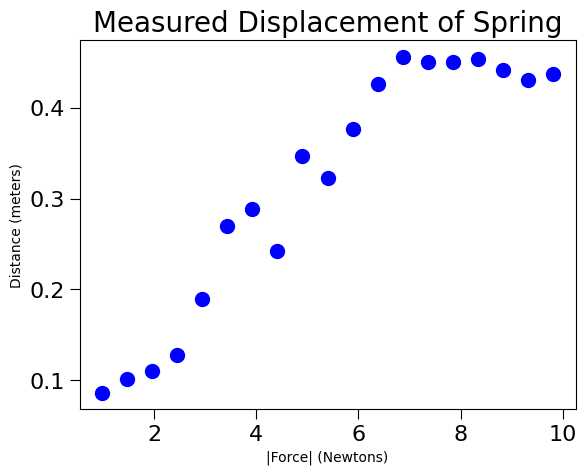

In [34]:
plotData('springData.txt')

This is not a Straight Line, even though according to Hooke's law it should be (F=kd), \
We can try fitting a straight line to the data

In [35]:
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = np.array(xVals)
    yVals = np.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 # F=kd; d=F/k
    a,b = pylab.polyfit(xVals, yVals, 1) # Fits a line yVals=a * xVals +b
    estYVals = a*pylab.array(xVals) + b # d = a*F+b
    print('a =', a, 'b =', b) # b should be 0
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = ' # therefore d=a*F; a= 1/k
               + str(round(1/a, 5)))
    pylab.legend(loc = 'best')
    

a = 0.046432033192052496 b = 0.06562859649122811


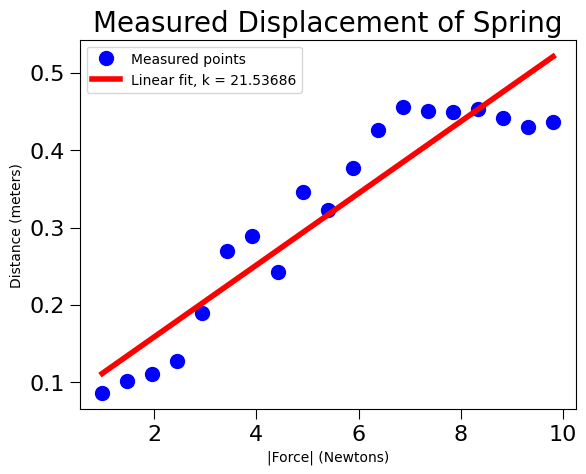

In [36]:
fitData('springData.txt')

In [37]:
def fitData_polynomial(fileName, dimensions):
    xVals, yVals = getData(fileName)
    xVals = np.array(xVals)
    yVals = np.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    model = pylab.polyfit(xVals, yVals, dimensions) # outputs a,b
    estYVals = pylab.polyval(model, xVals) #does y=ax+b
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/model[0], 5)))
    pylab.legend(loc = 'best')

Text(0.5, 1.0, 'Mystery Data')

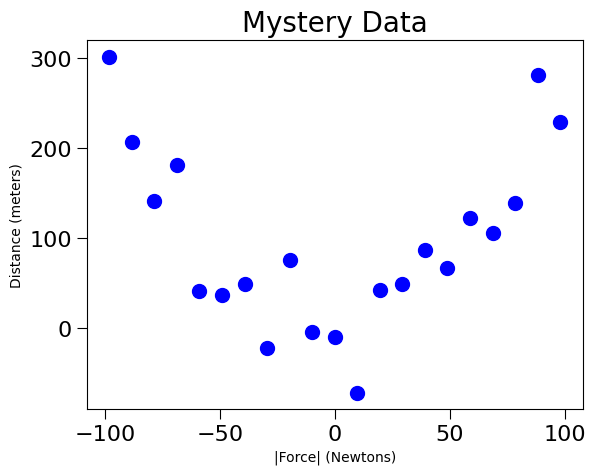

In [38]:
plotData('mysteryData.txt')
pylab.title('Mystery Data')

a = 0.03607896664251237 b = 97.75345103928552


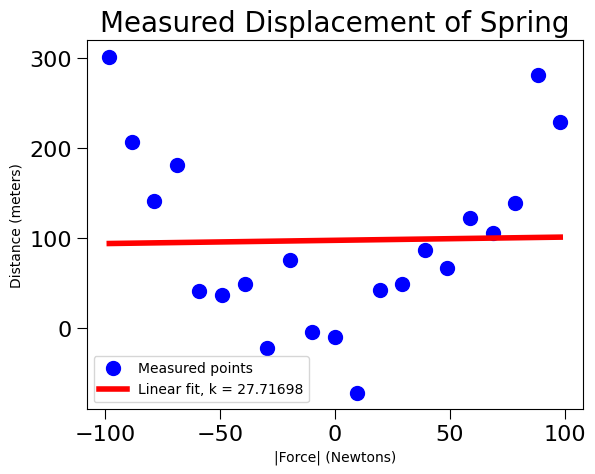

In [39]:
fitData('mysteryData.txt')

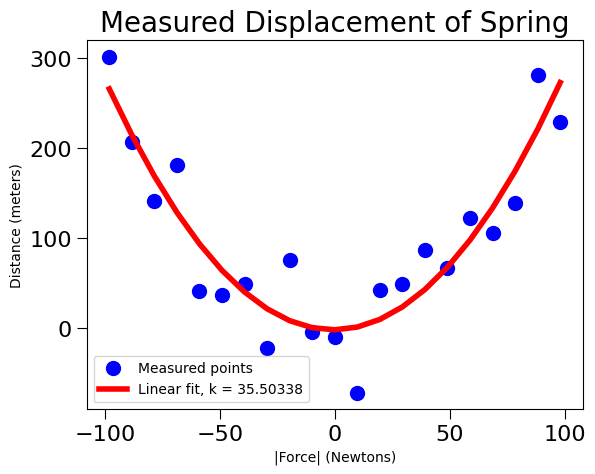

In [40]:
fitData_polynomial('mysteryData.txt',2)

Quadratic is better than linear

In [41]:
##Compare models
def aveMeanSquareError(data, predicted):
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

In [42]:
xVals, yVals = getData('mysteryData.txt')
model1 = pylab.polyfit(xVals, yVals, 1)
model2 = pylab.polyfit(xVals, yVals, 2)
estYVals = pylab.polyval(model1, xVals)  
print('Ave. mean square error for linear model =',
     aveMeanSquareError(yVals, estYVals))
estYVals = pylab.polyval(model2, xVals)
print('Ave. mean square error for quadratic model =',
     aveMeanSquareError(yVals, estYVals))


Ave. mean square error for linear model = 9372.730789652878
Ave. mean square error for quadratic model = 1524.0204471835434


$$ R^2 = 1 -\frac{\sum_{i=1}^{n} (y_i - p_i)^2}{\sum_{i=1}^{n}(y_i - \mu)^2}; \\
meanError =\frac{\sum_{i=1}^{n} (y_i - p_i)^2}{n}; \\
Variance = \frac{\sum_{i=1}^{n}(y_i - \mu)^2}{n}; \\
Thus, \frac{meanError}{Variance} = \frac{n * \sum_{i=1}^{n} (y_i - p_i)^2}
{n * \sum_{i=1}^{n}(y_i - \mu)^2} = \frac{\sum_{i=1}^{n} (y_i - p_i)^2}{\sum_{i=1}^{n}(y_i - \mu)^2}; \\
Therefore, R^2 = 1 -\frac{meanError}{Variance}$$
R squared is saying what portion of the variability in the data is accounted for by the model

In [43]:
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum() 
    meanError = error/len(observed) 
    return 1 - (meanError/np.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d) # Creates the a,b,c,d,etc. of the polynomial
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals) # Estimate the Y using the models
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

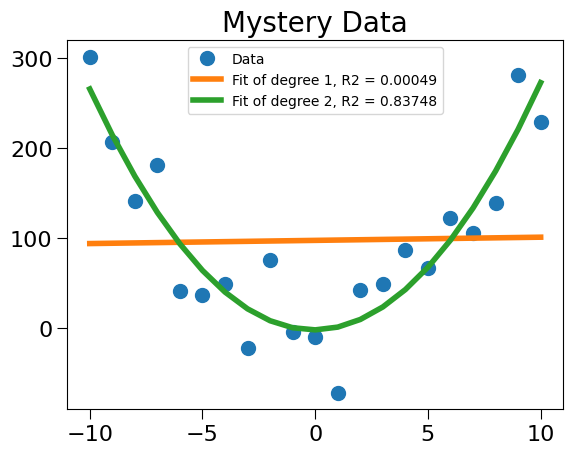

In [44]:
degrees = (1,2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

Degree 2 is better than Degree 1

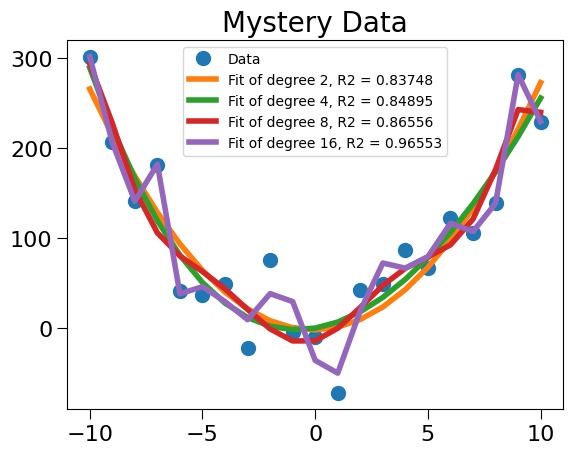

In [45]:
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

In [46]:
def genNoisyParabolicData(a, b, c, xVals, fName):
    yVals = []
    for x in xVals:
        theoreticalVal = a*x**2 + b*x + c
        yVals.append(theoreticalVal + random.gauss(0, 35)) # Theoretical Value + Normal Noise N(0,35^2)
    f = open(fName,'w')
    f.write('x        y\n')
    for i in range(len(yVals)):
        f.write(str(yVals[i]) + ' ' + str(xVals[i]) + '\n')
    f.close() #This is how the Mystery Data was generated
    

In [47]:
xVals = range(-10, 11, 1)
a, b, c = 3.0, 0.0, 0.0
degrees = (2, 4, 8, 16)
random.seed(0)
genNoisyParabolicData(a, b, c, xVals,
                     'Dataset 1.txt')
genNoisyParabolicData(a, b, c, xVals,
                     'Dataset 2.txt')

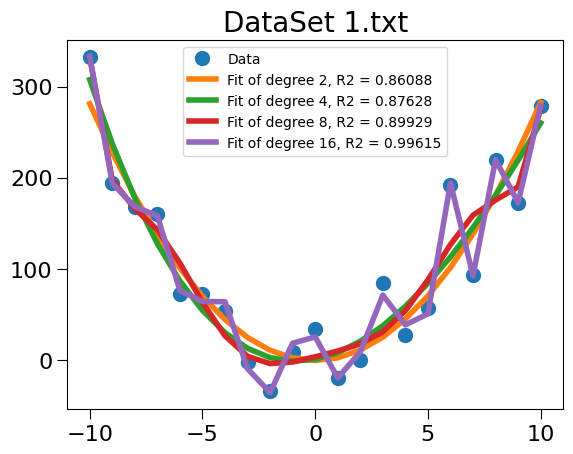

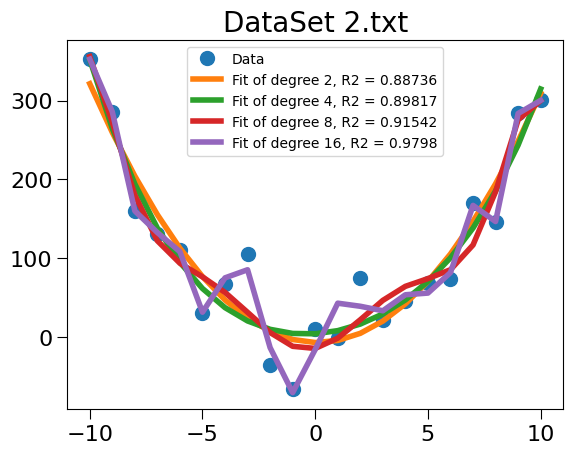

In [48]:
xVals1, yVals1 = getData('Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1,
       'DataSet 1.txt')

pylab.figure()
xVals2, yVals2 = getData('Dataset 2.txt')
models2 = genFits(xVals2, yVals2, degrees)
testFits(models2, degrees, xVals2, yVals2,
        'DataSet 2.txt')

Small Training Error but overfitting, let's train on one dataset and test on the other one

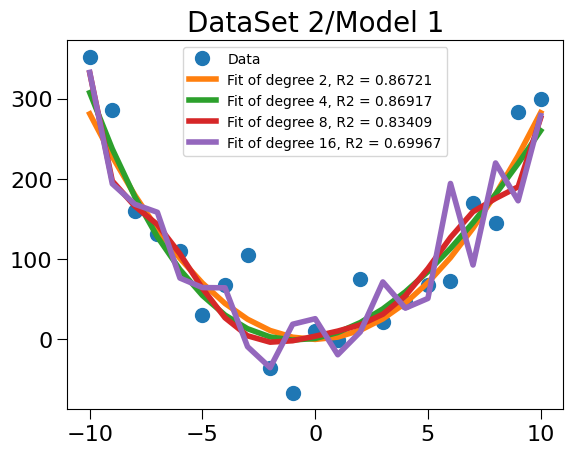

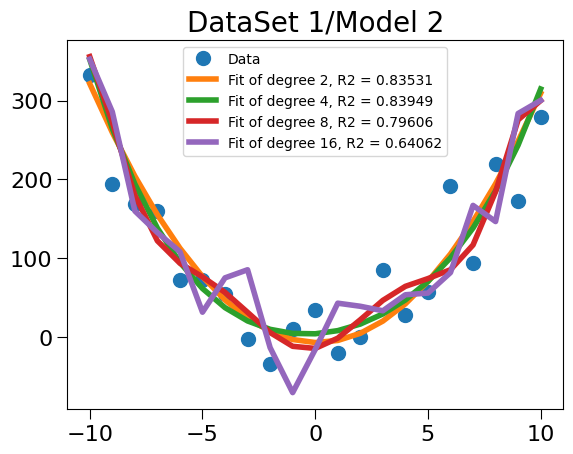

In [49]:
pylab.figure()
testFits(models1, degrees, xVals2, yVals2,
        'DataSet 2/Model 1')
pylab.figure()
testFits(models2, degrees, xVals1, yVals1,
        'DataSet 1/Model 2')

16 is overfitting, which is why Model 1 has low R-squared on Dataset 2, And Model 2 has low R-squared on  Dataset 1 respectively

a = -0.0 b = 1.0 c = 0.0
R-squared =  1.0


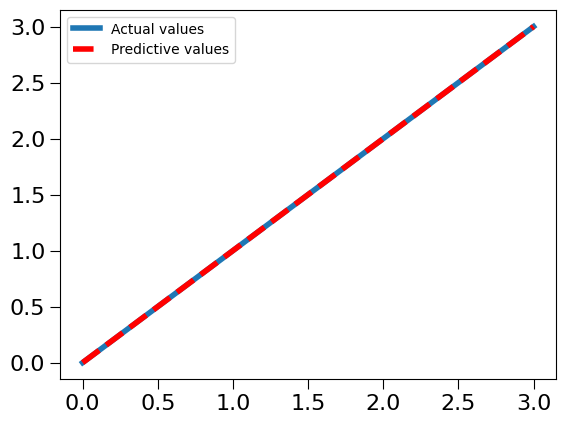

In [50]:
xVals = (0,1,2,3)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
a,b,c = pylab.polyfit(xVals, yVals, 2)
print('a =', round(a, 4), 'b =', round(b, 4),
     'c =', round(c, 4))
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

In case of Perfect Data, adding extra terms won't change the prediction. This is why when you fit $$y=ax^2 + bx + c$$ you get a=0

But this changes when you add a tiny bit of noise

[0.025 0.955 0.005]
R-squared =  0.9999057936881771


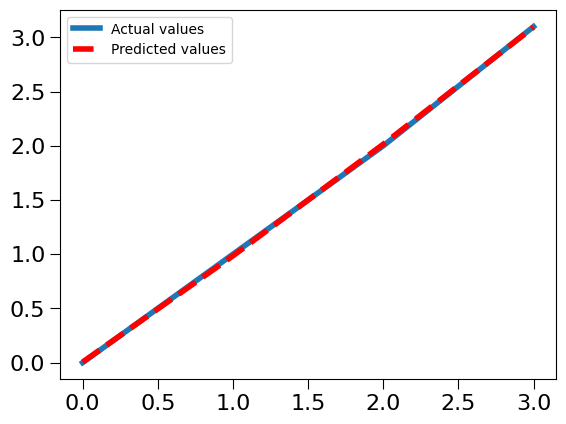

In [51]:
pylab.figure()
xVals = (0,1,2,3)
yVals = (0,1,2,3.1)
pylab.plot(xVals, yVals, label = 'Actual values')
model = pylab.polyfit(xVals, yVals, 2)
print(model)
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

The equation it comes up with is $$y=0.025x^2 + .955x + 0.005$$

R-squared =  0.7026164813486389


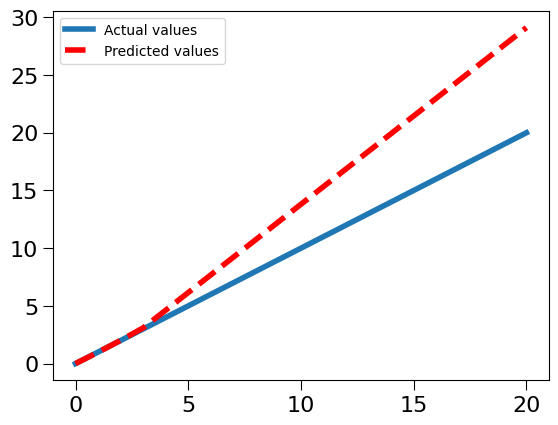

In [52]:
pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

When you test one more point (20,20), the prediction goes crazy

# Back to Hooke's law

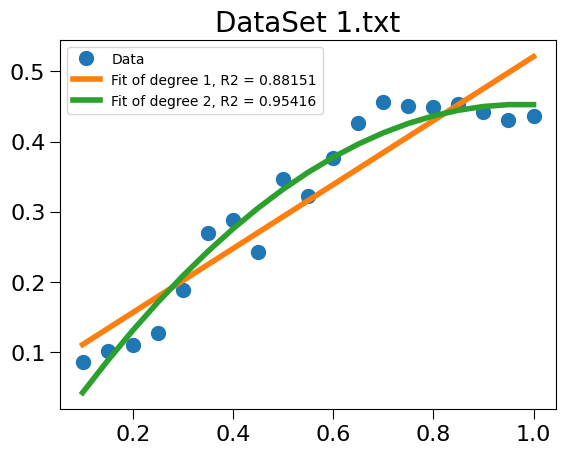

In [53]:
degrees = (1, 2)
xVals1, yVals1 = getData('springData.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1,
       'DataSet 1.txt')


Model holds until it reaches elastic limit. Should probabli fit different model to different segments

Leave one out or K-Fold CV or Repeated Random Sampling

In [54]:
class tempDatum(object):
    def __init__(self, s):
        info = s.split(',')
        self.high = float(info[1])
        self.year = int(info[2][0:4])
    def getHigh(self):
        return self.high
    def getYear(self):
        return self.year #Class returns high temperature and year

In [71]:
def getTempData():
    inFile = open('temperatures.csv')
    data = []
    for l in inFile:
        data.append(tempDatum(l))
    return data

def getYearlyMeans(data):
    years = {}
    for d in data:
        try:
            years[d.getYear()].append(d.getHigh()) # if d.getYear() is already there in the dictionary then append
        except:
            years[d.getYear()] = [d.getHigh()] # if d.getYear() is not there, then add a key
    for y in years:
        years[y] = sum(years[y])/len(years[y]) # Get average High Each year
    return years # each year has a temperature

In [78]:
random.sample(range(10),2)

[5, 3]

In [79]:
def splitData(xVals, yVals):
    toTrain = random.sample(range(len(xVals)), # Out of all this values
                            len(xVals)//2) # Pick half of them
    trainX, trainY, testX, testY = [],[],[],[]
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i]) # if the value is in toTrain add here
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

Text(0.5, 1.0, 'Select U.S. Cities')

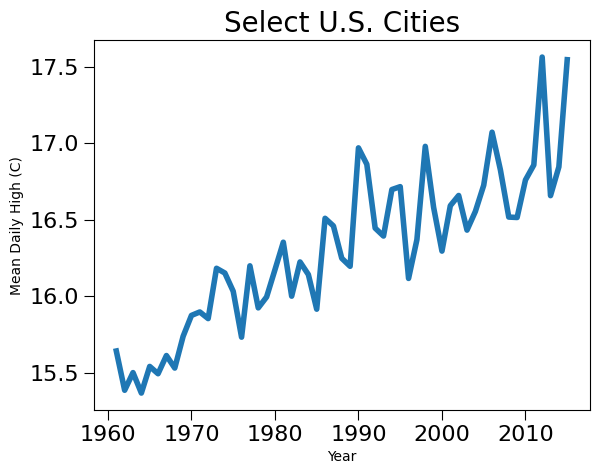

In [76]:
data = getTempData()
years = getYearlyMeans(data)
xVals, yVals = [], []
for e in years:
    xVals.append(e) #xVals has the years
    yVals.append(years[e]) #yVals has the temp

pylab.plot(xVals, yVals)
pylab.xlabel('Year')
pylab.ylabel('Mean Daily High (C)')
pylab.title('Select U.S. Cities')

In [97]:
numSubsets = 20
dimensions = (1, 2, 3, 4)
rSquares = {}
for d in dimensions:
   rSquares[d] = []

In [98]:
for f in range(numSubsets): #repeat numSubsets times
   trainX, trainY, testX, testY = splitData(xVals, yVals)
   for d in dimensions:
       model = pylab.polyfit(trainX, trainY, d)
    #    estYVals = pylab.polyval(model, trainX)
       estYVals = pylab.polyval(model, testX)
       rSquares[d].append(rSquared(testY, estYVals))
       # Create a model for each dimension and store the rSquares
# rSquares is a dictionary with each dimension as a key
# and each key will have a list with one value for each numSubsets

In [99]:
print('Mean R-squares for test data')
for d in dimensions:
   mean = round(sum(rSquares[d])/len(rSquares[d]), 4) 
   sd = round(np.std(rSquares[d]), 4)
   # For each dimension get mean Rsquared and SD
   print('For dimensionality', d, 'mean =', mean,
         'Std =', sd)

Mean R-squares for test data
For dimensionality 1 mean = 0.7463 Std = 0.0554
For dimensionality 2 mean = 0.7306 Std = 0.0674
For dimensionality 3 mean = 0.7044 Std = 0.0591
For dimensionality 4 mean = 0.6894 Std = 0.0913


Dimensionality 1 wins